___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

The project consists of 3 parts:
* First part is related with 'data cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns.
* Second part is related with 'filling data'. It deals with Missing Values. Categorical to numeric transformation is done.
* Third part is related with 'handling outliers of data' via Visualisation libraries. Some insights are extracted.


# PART- 3 `( Outliers )`

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10, 6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 150

In [3]:
df=pd.read_csv('autoscoutfinalpart2.csv')

In [4]:
#there 15919 rows and 130 columns in dataframe
df.shape

(15919, 27)

In [5]:
df.head()

,make_model,body_type,price,vat,km,type,previous_owners,inspection_new,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement,cylinders,weight,drive_chain,fuel,co2_emission,comfort_convenience,entertainment_media,extras,safety_security,gears,age,hp_kW,upholstery_fabric,comb_cons
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,2.000,1,Metallic,5.000,5.000,Automatic,1422.000,3.000,1220.000,front,Diesel,99.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.000,3.000,66.000,Cloth,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,1.000,0,Metallic,3.000,4.000,Automatic,1798.000,4.000,1255.000,front,Benzin,129.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.000,2.000,141.000,Cloth,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,1.000,0,Metallic,4.000,4.000,Automatic,1598.000,3.000,1135.000,front,Diesel,99.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.000,3.000,85.000,Cloth,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,1.000,0,Metallic,3.000,4.000,Automatic,1422.000,3.000,1195.000,front,Diesel,99.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.000,3.000,66.000,Cloth,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,1.000,1,Metallic,5.000,5.000,Automatic,1422.000,3.000,1135.000,front,Diesel,109.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",7.000,3.000,66.000,Cloth,4.100


In [6]:
df.tail()

,make_model,body_type,price,vat,km,type,previous_owners,inspection_new,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement,cylinders,weight,drive_chain,fuel,co2_emission,comfort_convenience,entertainment_media,extras,safety_security,gears,age,hp_kW,upholstery_fabric,comb_cons
15914,Renault Espace,Van,39950,VAT deductible,1647.363,New,1.000,0,Metallic,5.000,5.000,Automatic,1997.000,4.000,1758.000,front,Diesel,139.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",6.000,0.000,147.000,Part/Full Leather,5.300
15915,Renault Espace,Van,39885,VAT deductible,9900.000,Used,1.000,0,Metallic,5.000,5.000,Automatic,1798.000,4.000,1708.000,front,Benzin,168.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",7.000,0.000,165.000,Cloth,7.400
15916,Renault Espace,Van,39875,VAT deductible,15.000,Pre-registered,1.000,1,Metallic,5.000,7.000,Automatic,1997.000,4.000,1734.000,front,Diesel,139.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",6.000,0.000,146.000,Part/Full Leather,5.300
15917,Renault Espace,Van,39700,VAT deductible,10.000,Pre-registered,1.000,0,Metallic,5.000,7.000,Automatic,1997.000,4.000,1758.000,front,Diesel,139.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",6.000,0.000,147.000,Part/Full Leather,5.300
15918,Renault Espace,Van,40999,VAT deductible,1647.363,Demonstration,1.000,1,Metallic,5.000,5.000,Automatic,1798.000,4.000,1685.000,4WD,Benzin,153.000,"Air conditioning,Automatic climate control,Cru...",USB,"Alloy wheels,Touch screen","ABS,Blind spot monitor,Daytime running lights,...",6.000,0.000,165.000,Part/Full Leather,6.800


In [7]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,56013.000,80000.000,83450.000
type,Used,Used,Used
previous_owners,2.000,1.000,1.000
inspection_new,1,0,0
paint_type,Metallic,Metallic,Metallic
nr_of_doors,5.000,3.000,4.000


## Define functions to fill missing values

In [8]:
def fill_most(df, group_col, col_name):
    '''Fills the missing values with the most existing value (mode) in the relevant column according to single-stage grouping'''
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[col_name].mode()[0])
    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [9]:
def fill_prop(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [10]:
def fill(df, group_col1, group_col2, col_name, method): # method can be "mode" or "mean" or "median" or "ffill"
    '''Fills the missing values with "mode/mean/median/ffill method" according to double-stage grouping'''
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])

    elif method == "mean":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mean()).fillna(df[cond1][col_name].mean()).fillna(df[col_name].mean())
            
    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].median())
                
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

# Outlier Detection and Correction

### Feature: make_model

In [12]:
#count values
df.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [15]:
#drop Audi A2 since there is only one observation
df.drop(df[df['make_model']=='Audi A2'].index, inplace=True)

### Feature: body_type

In [17]:
#there is no outlier
df.body_type.value_counts()

Sedans           8005
Station wagon    3678
Compact          3242
Van               817
Transporter        88
Off-Road           55
Coupe              25
Convertible         8
Name: body_type, dtype: int64

### Feature: price

<AxesSubplot:xlabel='price', ylabel='Count'>

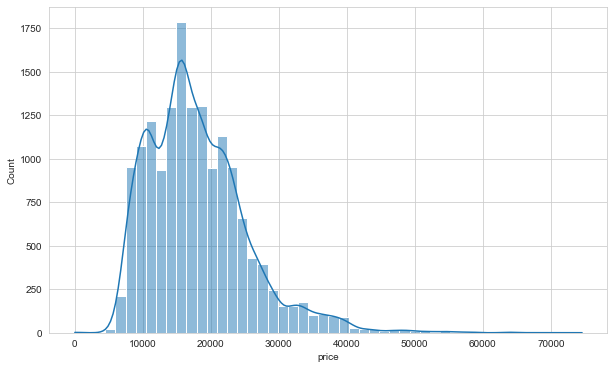

In [18]:
sns.histplot(df.price, bins=50, kde=True)

The distribution is almost normal.

<AxesSubplot:xlabel='price'>

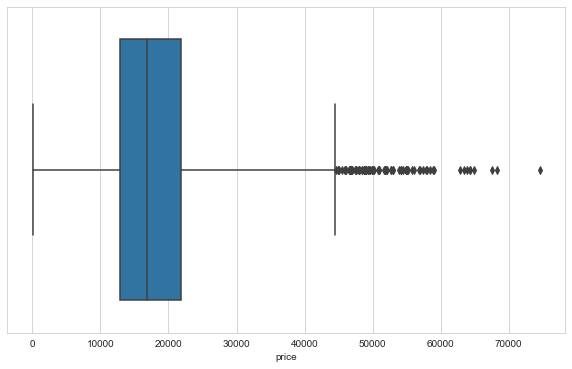

In [23]:
sns.boxplot(df.price, whis=2.5)

There are high prices, which could be potential outliers. But, we dont drop these values since car price could be high with respect to properties of cars.

### Feature: vat (value added taxes)

In [24]:
#there is no outlier
df.vat.value_counts()

VAT deductible      15047
Price negotiable      871
Name: vat, dtype: int64

### Feature: km

<AxesSubplot:xlabel='km', ylabel='Count'>

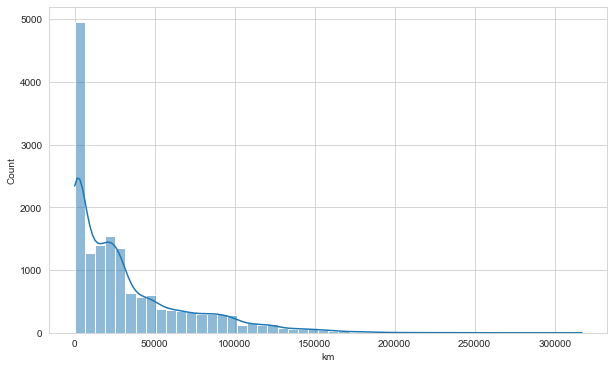

In [25]:
sns.histplot(df.km, bins=50, kde=True)

<AxesSubplot:xlabel='km'>

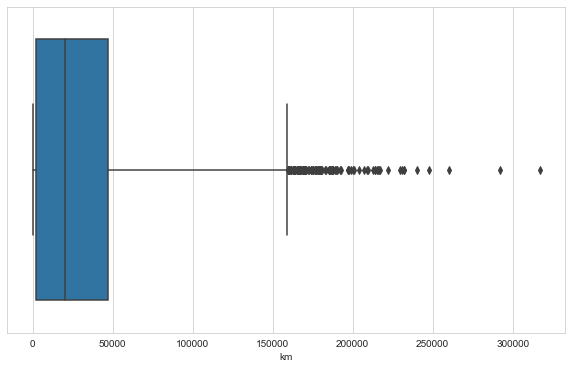

In [26]:
sns.boxplot(df.km, whis=2.5)

Cars could have high values of km due heavy usage. So, we will not consider high values as outliers.

### Feature: type

In [29]:
#there is no outlier
df.type.value_counts()

Used              11097
New                1651
Pre-registered     1364
Employee's car     1010
Demonstration       796
Name: type, dtype: int64

### Feature: previous_owners

In [30]:
#there is no outlier
df.previous_owners.value_counts()

1.000    14169
2.000     1172
0.000      546
3.000       29
4.000        2
Name: previous_owners, dtype: int64

### Feature: inspection_new

In [32]:
#no outlier
df.inspection_new.value_counts()

0    11986
1     3932
Name: inspection_new, dtype: int64

### Feature: paint_type

In [33]:
#no outlier
df.paint_type.value_counts()

Metallic       15249
Uni/basic        637
Perl effect       32
Name: paint_type, dtype: int64

### Feature: nr_of_doors

In [34]:
#no outlier
df.nr_of_doors.value_counts()

5.000    11788
4.000     3079
3.000      832
2.000      219
Name: nr_of_doors, dtype: int64

### Feature: nr_of_seats

In [35]:
#no outlier
df.nr_of_seats.value_counts()

5.000    14308
4.000     1127
7.000      362
2.000      119
6.000        2
Name: nr_of_seats, dtype: int64

### Feature: gearing_type

In [36]:
#no outlier
df.gearing_type.value_counts()

Manual            8152
Automatic         7297
Semi-automatic     469
Name: gearing_type, dtype: int64

### Feature: displacement

In [37]:
#all values seem to be normal
df.displacement.value_counts()

1598.000    5076
999.000     2467
1398.000    1388
1399.000     772
1461.000     682
1229.000     678
1956.000     670
1490.000     559
1422.000     467
1197.000     372
898.000      351
1395.000     320
1968.000     301
1149.000     288
1618.000     212
1798.000     210
1498.000     196
1600.000     130
1248.000     110
1997.000     103
1364.000     102
1400.000      90
998.000       72
1500.000      50
2000.000      46
1000.000      40
1998.000      25
2480.000      20
1984.000      18
1200.000      18
1397.000      11
899.000       11
929.000        5
1499.000       5
997.000        4
900.000        4
1596.000       4
1599.000       3
1396.000       3
1199.000       3
1589.000       2
1300.000       2
1495.000       2
995.000        2
890.000        1
1333.000       1
1580.000       1
1995.000       1
1533.000       1
1100.000       1
1198.000       1
1496.000       1
1368.000       1
1896.000       1
1584.000       1
1568.000       1
996.000        1
1696.000       1
1686.000      

### Feature: cylinders

In [46]:
#there is no outlier
df.cylinders.value_counts()

4.000    12954
3.000     2964
Name: cylinders, dtype: int64

### Feature: weight

In [47]:
df.weight.value_counts()

1163.000    1582
1360.000    1419
1487.000     966
1135.000     836
1425.000     744
1180.000     694
1273.000     656
1165.000     603
1503.000     561
1734.000     556
1087.000     291
1335.000     242
1365.000     211
1199.000     205
1350.000     156
1119.000     153
1355.000     136
1260.000     127
1280.000     127
1275.000     112
1278.000     110
1255.000     108
1200.000     107
1522.000     103
1659.000     102
1195.000      96
1120.000      93
1403.000      91
1701.000      87
1250.000      85
1685.000      83
1441.000      82
1308.000      80
1285.000      80
1613.000      75
1110.000      75
1279.000      72
1364.000      70
1345.000      67
1733.000      65
1325.000      64
1141.000      64
1209.000      64
1071.000      64
1230.000      63
1845.000      56
1090.000      54
1052.000      53
1154.000      52
1664.000      52
1513.000      51
1065.000      50
1237.000      49
1440.000      46
1088.000      46
1205.000      46
1265.000      45
1395.000      44
1666.000      

<AxesSubplot:xlabel='weight', ylabel='Count'>

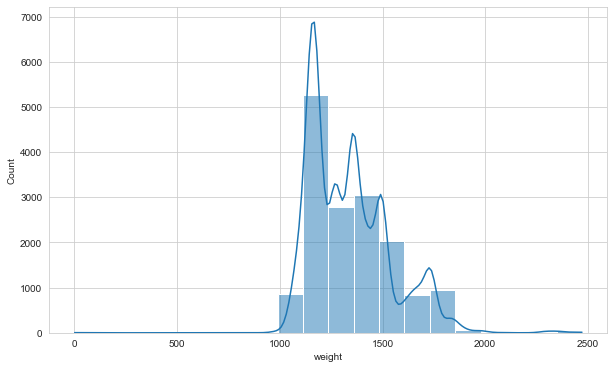

In [50]:
#weights have no outliers
sns.histplot(df.weight, bins=20, kde=True)

### Feature: drive_chain

In [52]:
#no outlier
df.drive_chain.value_counts()

front    15710
4WD        204
rear         4
Name: drive_chain, dtype: int64

### Feature: fuel

In [54]:
#no outlier
df.fuel.value_counts()

Benzin      8551
Diesel      7298
LPG/CNG       64
Electric       5
Name: fuel, dtype: int64

### Feature: co2_emission

In [55]:
df.co2_emission.value_counts()

120.000      836
119.000      714
102.000      694
104.000      679
106.000      623
114.000      555
99.000       545
97.000       538
139.000      523
124.000      516
103.000      445
107.000      413
108.000      362
125.000      342
129.000      333
128.000      331
133.000      330
118.000      314
110.000      289
126.000      282
85.000       275
127.000      257
117.000      254
111.000      237
113.000      235
109.000      234
140.000      221
105.000      202
135.000      202
92.000       198
130.000      189
123.000      188
150.000      174
143.000      171
112.000      171
95.000       161
116.000      157
141.000      156
98.000       151
136.000      145
137.000      133
134.000      130
145.000      126
149.000      117
153.000      113
147.000      109
101.000      105
132.000      100
115.000       86
122.000       83
121.000       82
138.000       77
93.000        66
131.000       61
168.000       58
142.000       58
90.000        54
148.000       48
144.000       

In [65]:
#there are outliers
df.co2_emission.describe()

count   15918.000
mean      123.032
std       248.500
min         0.000
25%       104.000
50%       118.000
75%       129.000
max     14457.000
Name: co2_emission, dtype: float64

In [99]:
#let us set emission values to NaN if the values are more than 200 and less than 36 (electric car's emission)
df['co2_emission'].mask((df['co2_emission']>200) | (df['co2_emission']<36) ,inplace=True)

In [100]:
df.co2_emission.isna().sum()

7

In [101]:
#fill the missing values 
fill(df,'make_model', 'fuel', 'co2_emission', 'mode')

Number of NaN :  0
------------------
120.000    836
119.000    720
102.000    695
104.000    679
106.000    625
114.000    555
99.000     545
97.000     538
139.000    527
124.000    517
103.000    445
107.000    413
108.000    362
125.000    342
129.000    333
128.000    331
133.000    330
118.000    314
110.000    289
126.000    282
85.000     275
127.000    257
117.000    254
111.000    237
113.000    235
109.000    234
140.000    221
105.000    202
135.000    202
92.000     198
130.000    189
123.000    188
150.000    174
143.000    171
112.000    171
95.000     161
141.000    159
116.000    157
98.000     151
136.000    145
137.000    133
134.000    130
145.000    126
149.000    117
153.000    113
147.000    109
101.000    105
132.000    100
115.000     86
122.000     83
121.000     82
138.000     77
93.000      66
131.000     61
168.000     58
142.000     58
90.000      54
148.000     48
144.000     40
154.000     40
94.000      37
146.000     36
100.000     36
151.000     34
18

### Feature: gears

In [102]:
#no outlier
df.gears.value_counts()

6.000    8625
5.000    4258
7.000    2810
8.000     225
Name: gears, dtype: int64

### Feature: age

In [103]:
#no outlier
df.age.value_counts()

1.000    4527
0.000    4435
3.000    3679
2.000    3277
Name: age, dtype: int64

### Feature: hp_kW

In [104]:
df.hp_kW.value_counts()

85.000     2542
66.000     2124
81.000     1403
100.000    1314
110.000    1113
70.000      890
125.000     711
51.000      696
55.000      589
118.000     550
92.000      466
121.000     392
147.000     380
77.000      353
56.000      294
54.000      276
103.000     253
87.000      232
165.000     194
88.000      177
60.000      160
162.000      98
74.000       81
96.000       72
71.000       59
101.000      47
67.000       40
154.000      39
122.000      35
119.000      30
164.000      27
135.000      24
52.000       22
82.000       22
1.000        20
78.000       20
294.000      18
146.000      18
141.000      16
57.000       10
120.000       8
104.000       8
112.000       7
191.000       7
155.000       6
117.000       6
184.000       5
65.000        4
90.000        4
76.000        4
168.000       3
98.000        3
149.000       3
80.000        3
93.000        3
167.000       2
228.000       2
53.000        2
143.000       2
150.000       2
140.000       2
270.000       2
63.000  

In [106]:
#there are outliers, which have smaller values such as 1
df.hp_kW.describe()

count   15918.000
mean       88.374
std        26.845
min         1.000
25%        66.000
50%        85.000
75%       101.000
max       294.000
Name: hp_kW, dtype: float64

In [113]:
df.hp_kW.sort_values().head(30)

6034     1.000
6946     1.000
7014     1.000
9285     1.000
9287     1.000
6005     1.000
9288     1.000
7018     1.000
9289     1.000
9290     1.000
9292     1.000
9299     1.000
10610    1.000
10580    1.000
10579    1.000
10468    1.000
15155    1.000
15156    1.000
7019     1.000
7016     1.000
13885    4.000
3913     9.000
8857    40.000
13759   40.000
8408    44.000
10282   51.000
10283   51.000
10284   51.000
10285   51.000
10286   51.000
Name: hp_kW, dtype: float64

In [115]:
#let us set emission values to NaN if the values are less than 40
df['hp_kW'].mask(df['hp_kW']<40 ,inplace=True)

In [116]:
df.hp_kW.isna().sum()

22

In [117]:
#fill the missing values 
fill(df,'make_model', 'fuel', 'hp_kW', 'mean')

Number of NaN :  0
------------------
85.000     2542
66.000     2124
81.000     1403
100.000    1314
110.000    1113
70.000      890
125.000     711
51.000      696
55.000      589
118.000     550
92.000      466
121.000     392
147.000     380
77.000      353
56.000      294
54.000      276
103.000     253
87.000      232
165.000     194
88.000      177
60.000      160
162.000      98
74.000       81
96.000       72
71.000       59
101.000      47
67.000       40
154.000      39
122.000      35
119.000      30
164.000      27
135.000      24
52.000       22
82.000       22
78.000       20
146.000      18
294.000      18
141.000      16
57.000       10
120.000       8
104.000       8
191.000       7
60.437        7
112.000       7
96.181        6
117.000       6
155.000       6
184.000       5
65.000        4
110.705       4
76.000        4
90.000        4
98.000        3
149.000       3
168.000       3
93.000        3
80.000        3
53.000        2
127.000       2
118.950       2
63

### Feature: upholstery_fabric

In [118]:
#no outlier
df.upholstery_fabric.value_counts()

Cloth                12237
Part/Full Leather     3681
Name: upholstery_fabric, dtype: int64

### Feature: comb_cons

In [119]:
df.comb_cons.value_counts()

4.000    1020
5.600     965
5.400     900
5.000     810
4.700     766
3.900     733
4.500     731
4.400     668
5.100     657
3.800     585
4.800     580
4.200     579
4.900     534
5.300     530
5.200     454
4.600     426
5.500     389
5.900     369
3.700     369
4.100     362
5.700     342
6.000     331
3.300     307
4.300     307
3.500     288
3.600     231
6.200     219
6.300     181
6.100     175
5.800     165
6.600     148
6.800     136
3.400     125
6.400      75
3.000      69
7.400      66
6.500      43
6.700      43
7.100      38
6.900      27
3.200      25
8.300      20
3.650      20
3.450      19
5.150      19
7.600      14
7.000      10
3.100       7
7.800       6
7.200       6
8.000       5
8.600       4
3.950       3
7.900       3
8.700       3
7.300       2
8.100       2
5.450       2
4.550       2
9.100       1
4.300       1
7.500       1
Name: comb_cons, dtype: int64

In [122]:
df.comb_cons.sort_values(ascending=False).head(50)

10771   9.100
10817   8.700
12529   8.700
12054   8.700
12422   8.600
12553   8.600
12530   8.600
10789   8.600
3592    8.300
3590    8.300
3610    8.300
3606    8.300
3605    8.300
3604    8.300
3603    8.300
3602    8.300
3600    8.300
3601    8.300
3599    8.300
3648    8.300
3598    8.300
3596    8.300
3595    8.300
3593    8.300
5161    8.300
3587    8.300
3649    8.300
10515   8.300
3608    8.100
3609    8.100
10571   8.000
10744   8.000
12654   8.000
10507   8.000
10548   8.000
12620   7.900
11219   7.900
11221   7.900
8319    7.800
8321    7.800
8326    7.800
8270    7.800
8268    7.800
11432   7.800
15672   7.600
15834   7.600
15831   7.600
15828   7.600
15825   7.600
15681   7.600
Name: comb_cons, dtype: float64

In [126]:
df[df.comb_cons>7.6]

,make_model,body_type,price,vat,km,type,previous_owners,inspection_new,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement,cylinders,weight,drive_chain,fuel,co2_emission,comfort_convenience,entertainment_media,extras,safety_security,gears,age,hp_kW,upholstery_fabric,comb_cons
3587,Audi A3,Sedans,64900,VAT deductible,35000.000,Used,1.000,0,Metallic,5.000,5.000,Semi-automatic,2480.000,4.000,1585.000,front,Benzin,189.000,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,1.000,294.000,Part/Full Leather,8.300
3590,Audi A3,Sedans,62900,VAT deductible,700.000,Used,1.000,0,Metallic,5.000,5.000,Semi-automatic,2480.000,4.000,1585.000,front,Benzin,194.000,"Air conditioning,Seat ventilation,Split rear s...","Bluetooth,Radio",Alloy wheels,"ABS,Adaptive Cruise Control,Alarm system,Centr...",7.000,0.000,294.000,Part/Full Leather,8.300
3592,Audi A3,Sedans,56900,VAT deductible,5200.000,Used,1.000,0,Metallic,5.000,5.000,Semi-automatic,2480.000,4.000,1585.000,4WD,Benzin,189.000,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.000,1.000,294.000,Part/Full Leather,8.300
3593,Audi A3,Sedans,58500,VAT deductible,10000.000,Used,1.000,0,Metallic,5.000,5.000,Semi-automatic,2480.000,4.000,1585.000,front,Benzin,189.000,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,1.000,294.000,Part/Full Leather,8.300
3595,Audi A3,Station wagon,63900,VAT deductible,10.000,Used,1.000,0,Metallic,5.000,5.000,Semi-automatic,2480.000,4.000,1585.000,front,Benzin,189.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles,Ski bag,Sport packa...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.000,0.000,294.000,Part/Full Leather,8.300
3596,Audi A3,Sedans,57400,Price negotiable,63000.000,Used,1.000,0,Metallic,5.000,5.000,Semi-automatic,2480.000,4.000,1585.000,4WD,Benzin,189.000,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Sport suspension,Tune...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.000,1.000,294.000,Part/Full Leather,8.300
3598,Audi A3,Sedans,55000,VAT deductible,24000.000,Used,1.000,0,Metallic,5.000,5.000,Semi-automatic,2480.000,4.000,1585.000,front,Benzin,189.000,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,2.000,294.000,Part/Full Leather,8.300
3599,Audi A3,Sedans,55000,VAT deductible,30000.000,Used,1.000,0,Metallic,4.000,5.000,Semi-automatic,2480.000,4.000,1590.000,front,Benzin,188.000,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,1.000,294.000,Part/Full Leather,8.300
3600,Audi A3,Sedans,53000,VAT deductible,4000.000,Used,1.000,0,Metallic,4.000,5.000,Semi-automatic,2480.000,4.000,1590.000,front,Benzin,188.000,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Shift paddles...","Adaptive Cruise Control,Adaptive headlights,Al...",7.000,1.000,294.000,Part/Full Leather,8.300
3601,Audi A3,Sedans,51900,VAT deductible,19000.000,Used,1.000,0,Metallic,5.000,5.000,Semi-automatic,2480.000,4.000,1585.000,front,Benzin,189.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Catalytic Converter,Shift paddles...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.000,2.000,294.000,Part/Full Leather,8.300


When the information of cars are checked, the values seem to be normal.

In [130]:
#all the features at hand
for feature in df.columns:
    print(feature)

make_model
body_type
price
vat
km
type
previous_owners
inspection_new
paint_type
nr_of_doors
nr_of_seats
gearing_type
displacement
cylinders
weight
drive_chain
fuel
co2_emission
comfort_convenience
entertainment_media
extras
safety_security
gears
age
hp_kW
upholstery_fabric
comb_cons


Now, we need to decide which one to drop before modelling.

In [133]:
#the following features are dropped before modelling
df.drop(['vat','type', 'paint_type', 'nr_of_seats','nr_of_doors','cylinders','drive_chain','upholstery_fabric'], axis=1, inplace=True)

In [135]:
#the final dataframe shape
df.shape

(15918, 19)

In [137]:
df.to_csv("final_scout_with_no_dummy.csv", index=False)